In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<ipython-input-27-7f33d6353c55>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-27-7f33d6353c55>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])


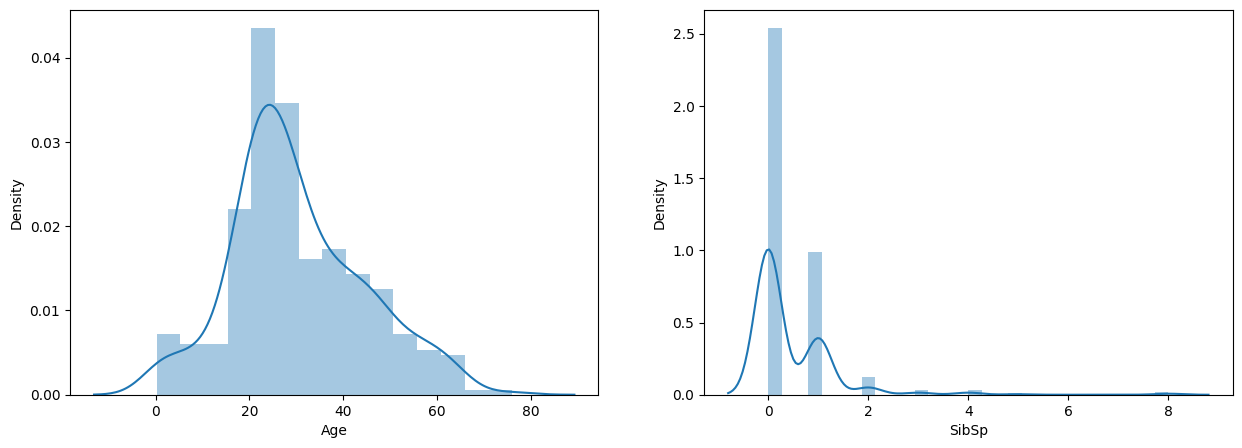

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
sns.distplot(df['SibSp'])
plt.show()

In [26]:
df['SibSp'].describe()

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

<Axes: xlabel='SibSp'>

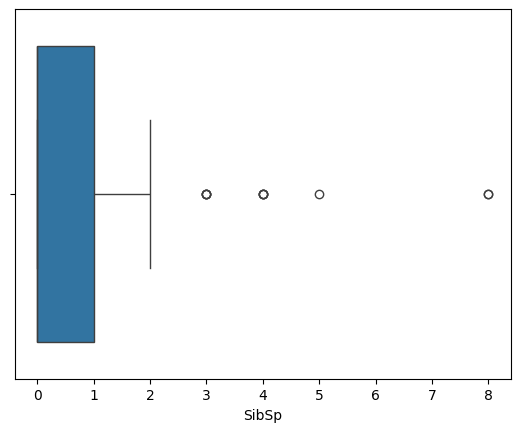

In [24]:
sns.boxplot(x=df['SibSp'])

In [42]:
percentile01=df['SibSp'].quantile(0.90)
percentile02=df['SibSp'].quantile(0.95)

In [36]:
percentile01

1.0

In [44]:
percentile02

2.0

In [45]:
IQR=percentile02-percentile01
IQR

1.0

In [46]:
upper_limit=percentile02+1.5*IQR
upper_limit

3.5

In [47]:
lower_limit=percentile01-1.5*IQR
lower_limit

-0.5

In [48]:
# finding outliers
df[df['SibSp']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S
379,1271,0,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S


In [49]:
df[df['SibSp']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [50]:
# trimming (outliers removing technique 1)

In [51]:
newdf=df[df['SibSp']<upper_limit]
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<ipython-input-52-d8c623f0773e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])
<ipython-input-52-d8c623f0773e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['SibSp'])


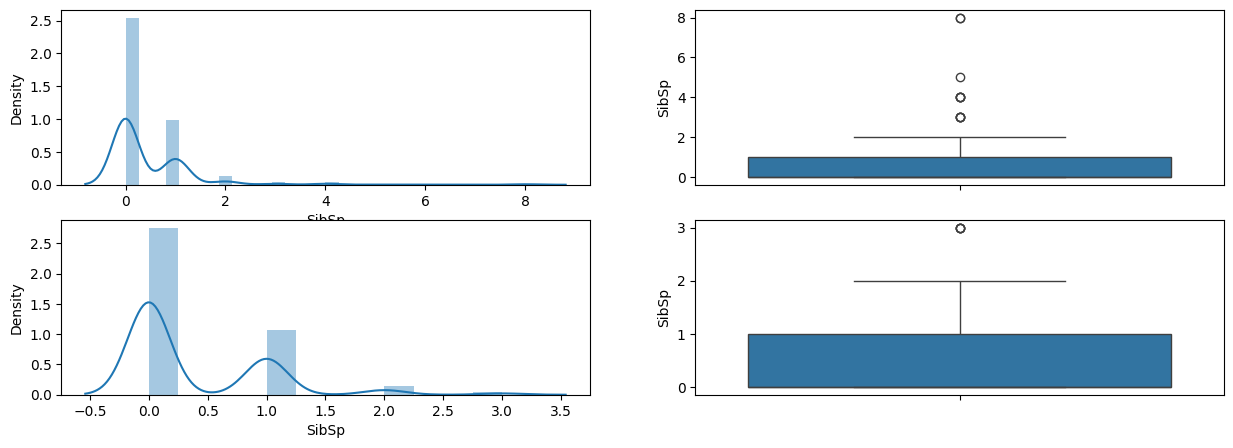

In [52]:
# comparision
plt.figure(figsize=(15,5))
plt.subplot(221)
sns.distplot(df['SibSp'])

plt.subplot(222)
sns.boxplot(df['SibSp'])

plt.subplot(223)
sns.distplot(newdf['SibSp'])

plt.subplot(224)
sns.boxplot(newdf['SibSp'])
plt.show()

In [53]:
# capping (outliers removing technique 2)
new_df_cap=df.copy()

In [54]:
new_df_cap['SibSp']=np.where(
    new_df_cap['SibSp']>upper_limit,
    upper_limit,

    np.where(
        new_df_cap['SibSp']<lower_limit,
        lower_limit,
        new_df_cap['SibSp']
    )
)

In [55]:
new_df_cap

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0.0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0.0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0.0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0.0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0.0,0,359309,8.0500,NaN,S


In [56]:
new_df_cap.shape

(418, 12)

<ipython-input-57-ebacd3ff4503>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])
<ipython-input-57-ebacd3ff4503>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['SibSp'])


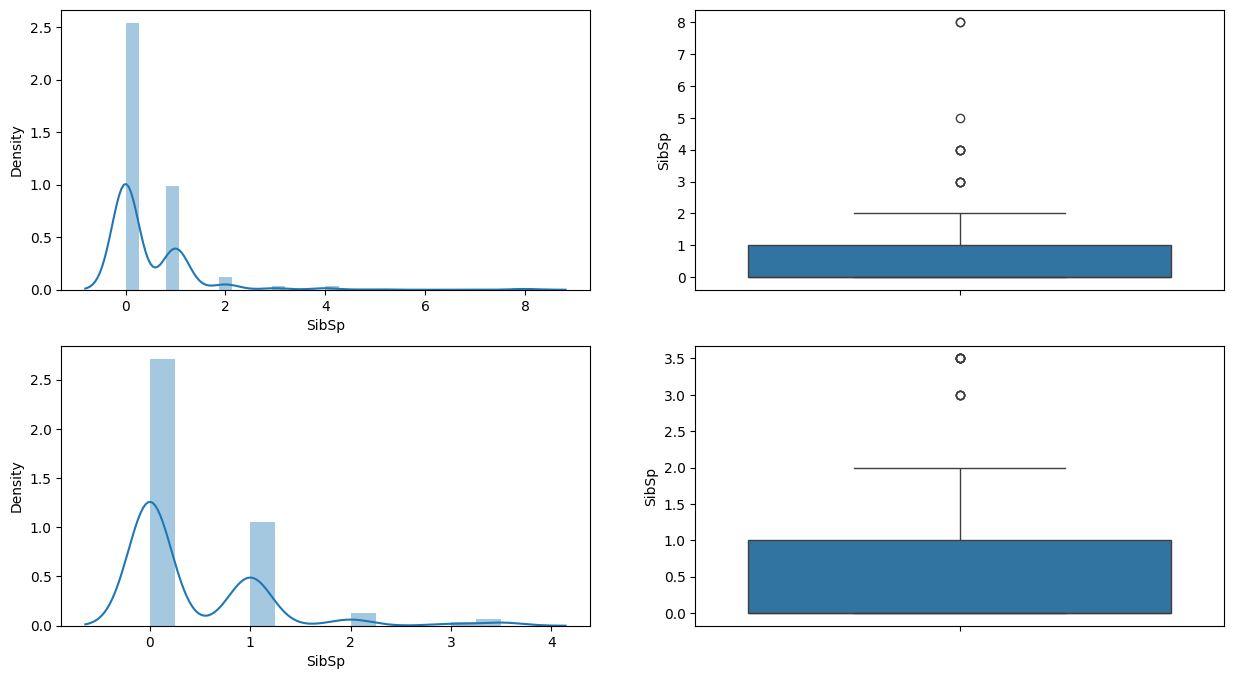

In [57]:
# comparision
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(df['SibSp'])

plt.subplot(222)
sns.boxplot(df['SibSp'])

plt.subplot(223)
sns.distplot(new_df_cap['SibSp'])

plt.subplot(224)
sns.boxplot(new_df_cap['SibSp'])
plt.show()